In [73]:
import matplotlib.pyplot as plt

In [74]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [75]:
import pandas as pd

In [76]:
# Load the CSV file into a DataFrame
hurricanes_df = pd.read_csv('Hurricane_Data/Storms.csv')

# Display the first few rows of the DataFrame
hurricanes_df.head()

,ID,Name,Type,Year,Category (Saffir-Simpson Scale),Wind (knots),Area,Gender of Name,Month(s),Start Date,End Date,Duration (days),Page url
0,Agni - Cyclone (2004),Agni,Cyclone,2004,1.0,65.0,Northern Indian,Female,"November, December",28/11/2004,3/12/2004,6,http://weather.unisys.com/hurricane/n_indian/2...
1,Aila - Cyclone (2009),Aila,Cyclone,2009,1.0,65.0,Northern Indian,Female,May,24/05/2009,25/05/2009,2,http://weather.unisys.com/hurricane/n_indian/2...
2,Laila - Cyclone (2010),Laila,Cyclone,2010,1.0,65.0,Northern Indian,Female,May,17/05/2010,21/05/2010,5,http://weather.unisys.com/hurricane/n_indian/2...
3,Mala - Cyclone (2006),Mala,Cyclone,2006,4.0,115.0,Northern Indian,Female,April,24/04/2006,29/04/2006,6,http://weather.unisys.com/hurricane/n_indian/2...
4,Nargis - Cyclone (2008),Nargis,Cyclone,2008,4.0,115.0,Northern Indian,Female,"April, May",27/04/2008,3/05/2008,7,http://weather.unisys.com/hurricane/n_indian/2...


In [77]:
print(hurricanes_df.columns.tolist())

['ID', 'Name', 'Type', 'Year', 'Category (Saffir-Simpson Scale)', 'Wind (knots)', 'Area', 'Gender of Name', 'Month(s)', 'Start Date', 'End Date', 'Duration (days)', 'Page url']


In [78]:
# Remove multiple columns correctly
hurricanes_df.drop(columns=['Gender of Name'], inplace=True)

# Display the first few rows of the modified DataFrame
hurricanes_df.head()

,ID,Name,Type,Year,Category (Saffir-Simpson Scale),Wind (knots),Area,Month(s),Start Date,End Date,Duration (days),Page url
0,Agni - Cyclone (2004),Agni,Cyclone,2004,1.0,65.0,Northern Indian,"November, December",28/11/2004,3/12/2004,6,http://weather.unisys.com/hurricane/n_indian/2...
1,Aila - Cyclone (2009),Aila,Cyclone,2009,1.0,65.0,Northern Indian,May,24/05/2009,25/05/2009,2,http://weather.unisys.com/hurricane/n_indian/2...
2,Laila - Cyclone (2010),Laila,Cyclone,2010,1.0,65.0,Northern Indian,May,17/05/2010,21/05/2010,5,http://weather.unisys.com/hurricane/n_indian/2...
3,Mala - Cyclone (2006),Mala,Cyclone,2006,4.0,115.0,Northern Indian,April,24/04/2006,29/04/2006,6,http://weather.unisys.com/hurricane/n_indian/2...
4,Nargis - Cyclone (2008),Nargis,Cyclone,2008,4.0,115.0,Northern Indian,"April, May",27/04/2008,3/05/2008,7,http://weather.unisys.com/hurricane/n_indian/2...


In [79]:
# Step 1: Filter for hurricanes in the Atlantic
atlantic_hurricanes_df = hurricanes_df[hurricanes_df['Area'].str.contains('Atlantic', case=False, na=False)].copy()

# Step 2: Convert 'Year' column to numeric, coercing errors to NaN
atlantic_hurricanes_df['Year'] = pd.to_numeric(atlantic_hurricanes_df['Year'], errors='coerce')

# Step 3: Filter for hurricanes in the Atlantic from 1980 to 2014
atlantic_hurricanes_filtered_df = atlantic_hurricanes_df[
    (atlantic_hurricanes_df['Year'] >= 1980) & (atlantic_hurricanes_df['Year'] <= 2014)
]

# Optionally, display the first few rows of the filtered DataFrame
atlantic_hurricanes_filtered_df.head()

,ID,Name,Type,Year,Category (Saffir-Simpson Scale),Wind (knots),Area,Month(s),Start Date,End Date,Duration (days),Page url
176,Allison - Hurricane (1995),Allison,Hurricane,1995.0,1.0,65.0,Atlantic,June,3/06/1995,6/06/1995,4,http://weather.unisys.com/hurricane/atlantic/1...
177,Bertha - Hurricane (2014),Bertha,Hurricane,2014.0,1.0,70.0,Atlantic,August,1/08/2014,6/08/2014,6,http://weather.unisys.com/hurricane/atlantic/2...
178,Bonnie - Hurricane (1998),Bonnie,Hurricane,1998.0,3.0,100.0,Atlantic,August,19/08/1998,30/08/1998,12,http://weather.unisys.com/hurricane/atlantic/1...
179,Cindy - Hurricane (1999),Cindy,Hurricane,1999.0,4.0,120.0,Atlantic,August,19/08/1999,31/08/1999,13,http://weather.unisys.com/hurricane/atlantic/1...
180,Cindy - Hurricane (2005),Cindy,Hurricane,2005.0,1.0,65.0,Atlantic,July,3/07/2005,7/07/2005,5,http://weather.unisys.com/hurricane/atlantic/2...


In [80]:
# Count the number of rows using shape
row_count = atlantic_hurricanes_filtered_df.shape[0]
print(f"Number of rows: {row_count}")

Number of rows: 214


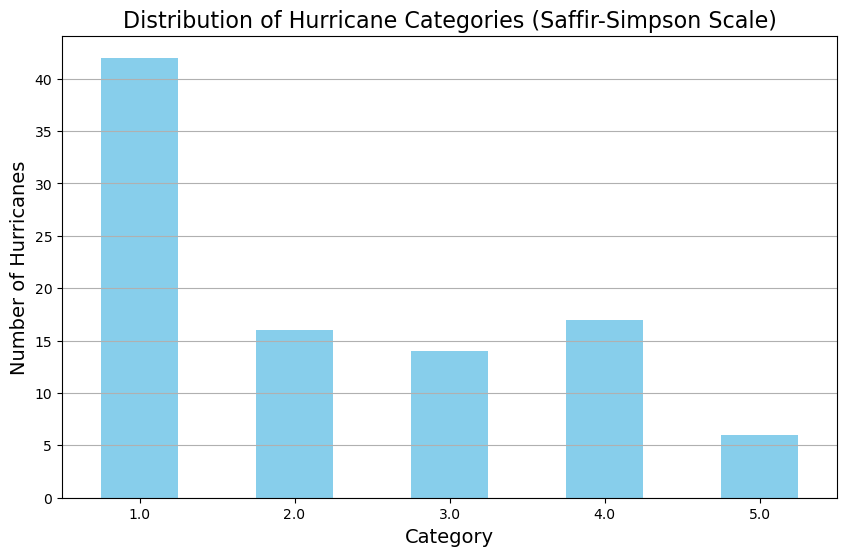

In [81]:
# Step 1: Count occurrences of each category in the "Category (Saffir-Simpson Scale)" column
category_counts = atlantic_hurricanes_filtered_df['Category (Saffir-Simpson Scale)'].value_counts().sort_index()

# Step 2: Create a bar graph
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title('Distribution of Hurricane Categories (Saffir-Simpson Scale)', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Number of Hurricanes', fontsize=14)

# Show grid for better readability
plt.grid(axis='y')

# Display the plot
plt.xticks(rotation=0)  # Rotate x-axis labels to horizontal
plt.show()

In [82]:
# Filter for hurricanes from the year 1995
hurricanes_1995 = atlantic_hurricanes_filtered_df[atlantic_hurricanes_filtered_df['Year'] == 1995]

# Display the filtered DataFrame
hurricanes_1995.head()

,ID,Name,Type,Year,Category (Saffir-Simpson Scale),Wind (knots),Area,Month(s),Start Date,End Date,Duration (days),Page url
176,Allison - Hurricane (1995),Allison,Hurricane,1995.0,1.0,65.0,Atlantic,June,3/06/1995,6/06/1995,4,http://weather.unisys.com/hurricane/atlantic/1...


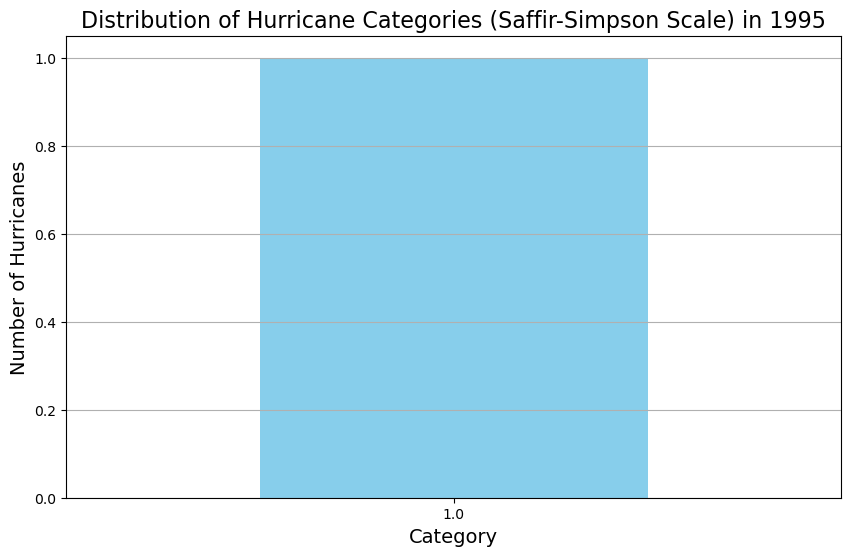

In [84]:
# Step 1: Count occurrences of each category in the "Category (Saffir-Simpson Scale)" column
category_counts = hurricanes_1995['Category (Saffir-Simpson Scale)'].value_counts().sort_index()

# Step 2: Create a bar graph
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title('Distribution of Hurricane Categories (Saffir-Simpson Scale) in 1995', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Number of Hurricanes', fontsize=14)

# Show grid for better readability
plt.grid(axis='y')

# Display the plot
plt.xticks(rotation=0)  # Rotate x-axis labels to horizontal
plt.show()

In [85]:
# Filter for hurricanes from the year 1995
hurricanes_2005 = atlantic_hurricanes_filtered_df[atlantic_hurricanes_filtered_df['Year'] == 2005]

# Display the filtered DataFrame
hurricanes_2005.head()

,ID,Name,Type,Year,Category (Saffir-Simpson Scale),Wind (knots),Area,Month(s),Start Date,End Date,Duration (days),Page url
180,Cindy - Hurricane (2005),Cindy,Hurricane,2005.0,1.0,65.0,Atlantic,July,3/07/2005,7/07/2005,5,http://weather.unisys.com/hurricane/atlantic/2...
183,Emily - Hurricane (2005),Emily,Hurricane,2005.0,4.0,135.0,Atlantic,July,11/07/2005,21/07/2005,11,http://weather.unisys.com/hurricane/atlantic/2...
193,Irene - Hurricane (2005),Irene,Hurricane,2005.0,2.0,85.0,Atlantic,August,4/08/2005,18/08/2005,15,http://weather.unisys.com/hurricane/atlantic/2...
201,Katrina - Hurricane (2005),Katrina,Hurricane,2005.0,5.0,150.0,Atlantic,August,23/08/2005,31/08/2005,9,http://weather.unisys.com/hurricane/atlantic/2...
205,Maria - Hurricane (2005),Maria,Hurricane,2005.0,3.0,100.0,Atlantic,September,1/09/2005,10/09/2005,10,http://weather.unisys.com/hurricane/atlantic/2...


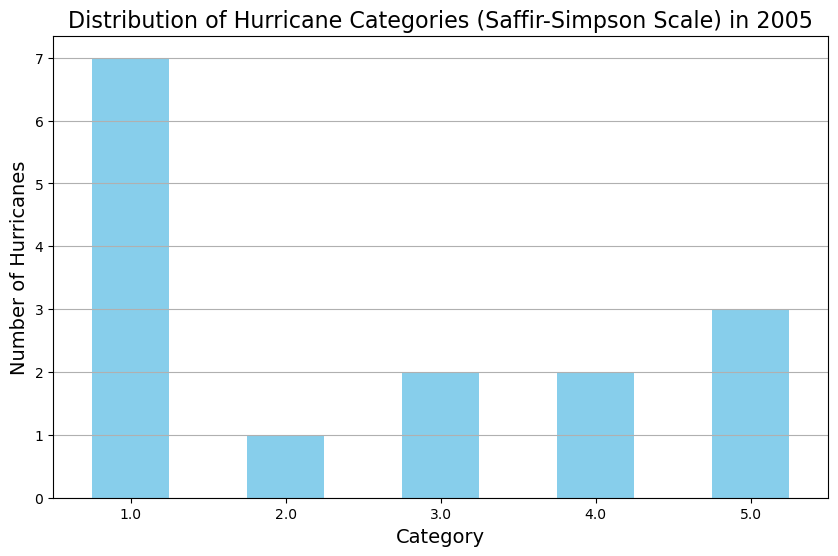

In [86]:
# Step 1: Count occurrences of each category in the "Category (Saffir-Simpson Scale)" column
category_counts = hurricanes_2005['Category (Saffir-Simpson Scale)'].value_counts().sort_index()

# Step 2: Create a bar graph
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title('Distribution of Hurricane Categories (Saffir-Simpson Scale) in 2005', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Number of Hurricanes', fontsize=14)

# Show grid for better readability
plt.grid(axis='y')

# Display the plot
plt.xticks(rotation=0)  # Rotate x-axis labels to horizontal
plt.show()

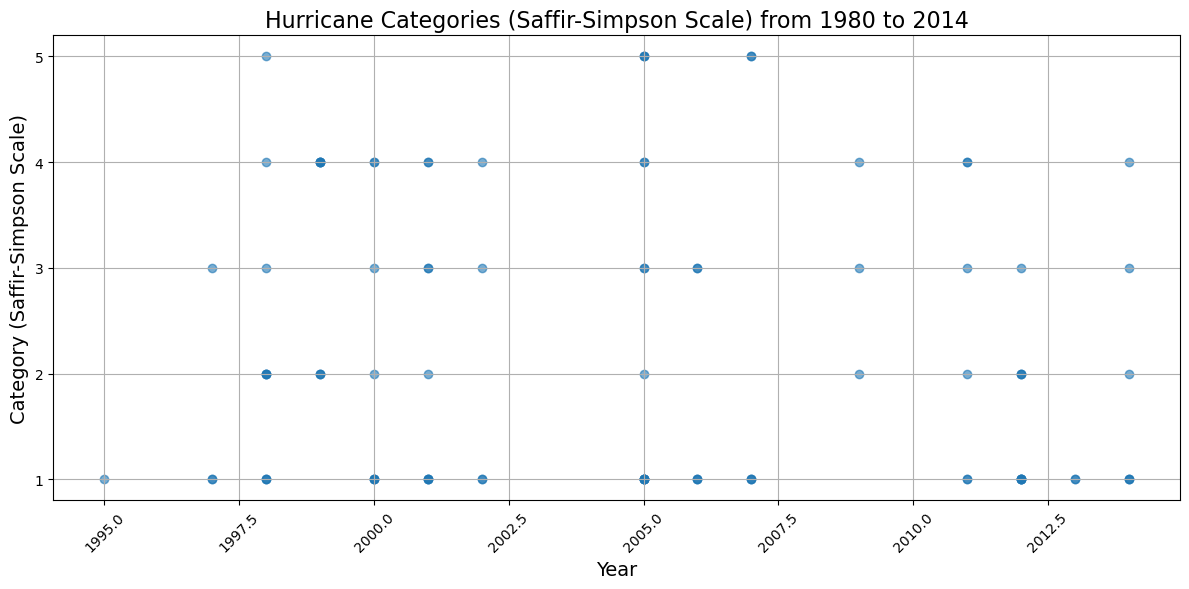

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming atlantic_hurricanes_filtered_df is already defined and contains the relevant data

# Step 1: Filter for years 1980 to 2014
filtered_df = atlantic_hurricanes_filtered_df[(atlantic_hurricanes_filtered_df['Year'] >= 1980) & 
                                               (atlantic_hurricanes_filtered_df['Year'] <= 2014)]

# Step 2: Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(filtered_df['Year'], filtered_df['Category (Saffir-Simpson Scale)'], alpha=0.6)

# Add titles and labels
plt.title('Hurricane Categories (Saffir-Simpson Scale) from 1980 to 2014', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Category (Saffir-Simpson Scale)', fontsize=14)

# Set y-ticks to show categories clearly
plt.yticks([1, 2, 3, 4, 5], ['1', '2', '3', '4', '5'])

# Show grid for better readability
plt.grid()

# Display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()